In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('resultados/modelo.csv.zip')
df.fillna(0, inplace=True)
rmsp = (df.rm == 20)
subnormal = (df.tipo_do_setor == 1)
df.loc[:, 'subnormal'] = 0
df.loc[subnormal, 'subnormal'] = 1

/tmp/ipykernel_11685/1804806534.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('resultados/modelo.csv.zip')


In [3]:
dimensoes = [
    'situacao_setor',
    'porcentagem_domicilios_sem_coleta_de_lixo',
    'porcentagem_domicilios_sem_ligacao_rede_de_agua',
    'porcentagem_domicilios_sem_banheiros',
    'porcentagem_domicilios_sem_esgoto_ou_fossa',
    # # 'porcentagem_domicilios_tipo_comodo',
    'porcentagem_domicilios_cedidos_outra_forma',
    'porcentagem_domicilios_em_outra_condicao_de_ocupacao',
    'numero_de_banheiros_por_habitante',
    'porcentagem_responsaveis_nao_alfabetizado',
    'porcentagem_responsaveis_nao_alfabetizado_com_menos_de_30_anos',
    'porcentagem_responsaveis_renda_ate_3_salarios',
    # # 'porcentagem_responsaveis_menos_8_anos_de_estudo',
    # # 'anos_medios_estudo_responsavel',
    'renda_media_responsavel',
    'numero_de_domicilios_particulares_permanentes',
    'numero_de_domicilios_improvisados',
    'numero_de_pessoas_residentes',
    'porcentagem_de_responsaveis_com_menos_30_anos',
    'numero_medio_pessoas',
    'densidade_populacional',
    'densidade_domicilios'
]

In [4]:
df.loc[rmsp].subnormal.value_counts()

subnormal
0    26709
1     3234
Name: count, dtype: int64

In [5]:
samples = df.loc[rmsp & (df.loc[rmsp].subnormal == 1)].shape[0]

In [6]:
x = df.loc[(rmsp) & (subnormal)]
x_ = df.loc[(rmsp) & (~subnormal)].sample(n=samples*2, random_state=51)

In [7]:
pd.concat([x, x_]).shape

(9702, 33)

In [8]:
X = pd.concat([x, x_]).loc[(rmsp), dimensoes]
y = pd.concat([x, x_]).loc[(rmsp), 'subnormal']

In [10]:
transformer = Normalizer().fit(X)
# transformer.transform(X)

In [11]:
X = transformer.transform(X)

In [12]:
y.value_counts()

subnormal
0    6468
1    3234
Name: count, dtype: int64

In [13]:
random_forest_clf = RandomForestClassifier(max_depth=10, random_state=0)
random_forest_clf.fit(X,y)
random_forest_clf.score(X,y)

0.9641311069882499

In [14]:
cf_matrix = confusion_matrix(y, random_forest_clf.predict(X))

<Axes: >

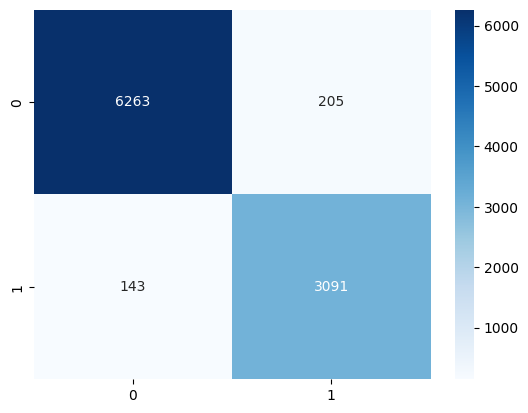

In [15]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='0', cmap='Blues')

In [16]:
np.unique(random_forest_clf.predict(df.loc[(rmsp), dimensoes]), return_counts=True)

/home/feromes/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


(array([0, 1]), array([12597, 17346]))

In [14]:
linear_svc_clf = LinearSVC(random_state=0, tol=1e-5)
# linear_svc_clf = SVC(gamma='auto')
linear_svc_clf.fit(Normalizer().fit_transform(X),y)
linear_svc_clf.score(Normalizer().fit_transform(X),y)

0.7445887445887446

In [15]:
cf_matrix = confusion_matrix(y, linear_svc_clf.predict(Normalizer().fit_transform(X)))

<Axes: >

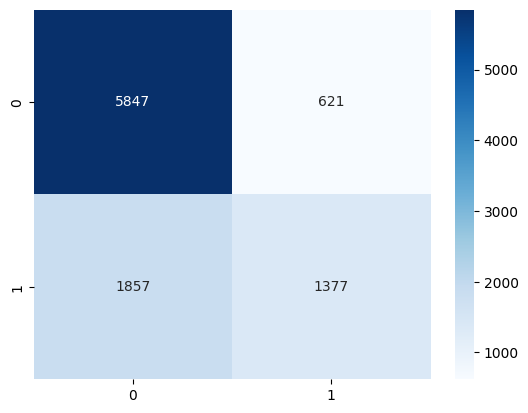

In [16]:
sns.heatmap(cf_matrix, annot=True, fmt='0', cmap='Blues')

In [17]:
np.unique(linear_svc_clf.predict(Normalizer().fit_transform(df.loc[(rmsp), dimensoes])), return_counts=True)

(array([0, 1]), array([26074,  3869]))